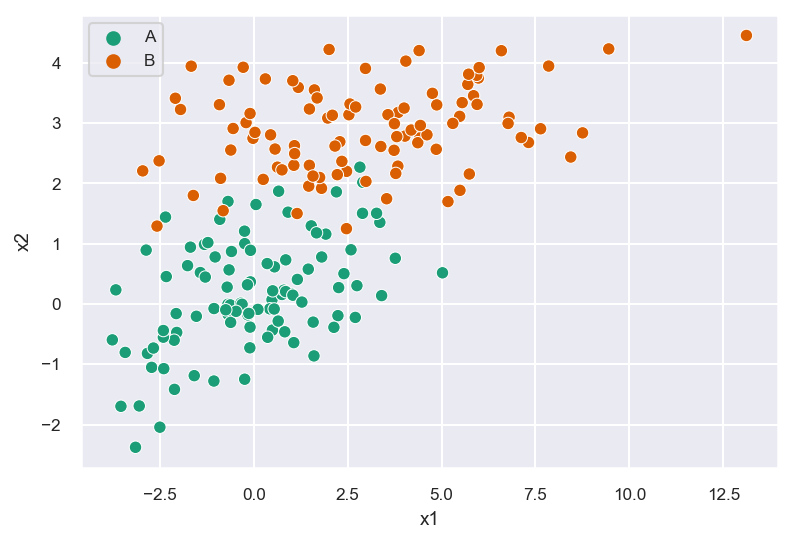

In [1]:
# preamble, load all required packages and setup some stuff
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pylab
import seaborn as sns
sns.set(context='notebook', palette='Dark2', font_scale=.75)  # for plots
pylab.rcParams['figure.dpi'] = 150

# load and visualize dataset
data = pd.read_csv('data/non_linsep.csv')

fig, ax = plt.subplots()
sns.scatterplot(x='x1', y='x2', hue=data['cls'].tolist(), data=data, ax=ax)
plt.show()

MSE: 0.020075630399981125 | Misclassifications: 1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

KeyboardInterrupt: 

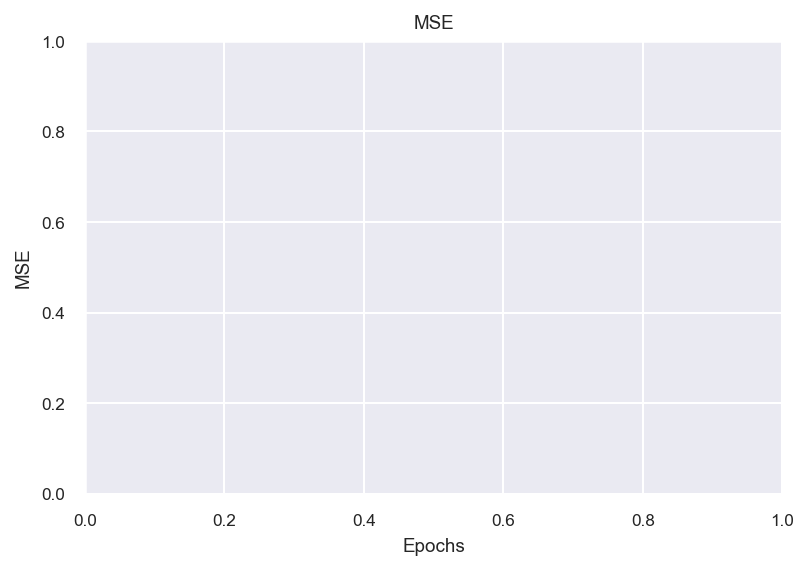

In [4]:
from mlp import TwoLayerPerceptron
import time

tlp = TwoLayerPerceptron(dims=2, hidden_nodes=150)

# prepare data for training deltaperceptrons
# delta rule uses symmetric target values
dp_data = data.copy()
dp_data['cls'] = dp_data['cls'].apply(lambda c: -1 if c == 'A' else 1).astype('category')

fig, ax = plt.subplots()
ax.set_title('MSE')
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE')
# ax.set_xlim(0, 5e2)
# ax.set_ylim(0, 4)
error = [np.inf]

def plot_callback(epochs, misses, mse):
    print(f'\rMSE: {mse} | Misclassifications: {misses}', end='                                ')
    error.append(mse)
#     if len(ax.lines) > 0:
#         ax.lines[0].remove()
#     ax.plot(range(epochs + 1), error, 'r-')
#     plt.pause(0.01)
    
tlp.train(dp_data.to_numpy(), eta=1e-2, callback=plot_callback)

ax.plot(range(0, len(error)), error, 'r-')
plt.show()